Combining PCA with clustering has several benefits. Here’s why you might want to use PCA before clustering and what advantages it offers:

### 1. **Dimensionality Reduction**
- **Simplifies Data**: PCA reduces the number of features while preserving most of the data’s variability. This simplifies the dataset, making it easier to work with.
- **Reduces Noise**: By focusing on the principal components that capture the most variance, PCA can help reduce noise from less important features.

### 2. **Improves Clustering Performance**
- **Speeds Up Computation**: Clustering algorithms like K-Means can be computationally intensive with high-dimensional data. PCA reduces the number of dimensions, which can significantly speed up the clustering process.
- **Mitigates Curse of Dimensionality**: High-dimensional spaces can cause clustering algorithms to perform poorly due to the curse of dimensionality. PCA helps by reducing dimensions and improving the performance of clustering algorithms.

### 3. **Enhances Visualization**
- **2D or 3D Visualization**: PCA can reduce data to 2 or 3 principal components, making it easier to visualize clusters in 2D or 3D plots.
- **Better Insights**: Visualizing clusters in lower dimensions helps in understanding the data structure and the separation between clusters.

### 4. **De-correlates Features**
- **Orthogonal Components**: PCA transforms features into orthogonal components, which are uncorrelated. This can help clustering algorithms like K-Means that assume clusters are spherical in shape.
- **Improves Clustering Quality**: De-correlated features can improve the quality of the clusters formed by the algorithm.

### 5. **Preprocessing for Clustering**
- **Standardization and Scaling**: PCA includes steps to standardize and scale the data, which are important preprocessing steps for many clustering algorithms.
- **Consistent Preprocessing**: Using PCA ensures that data is preprocessed consistently before clustering, leading to more reliable results.

### Explanation

1. **Data Preprocessing**:
   - Standardize numerical features and encode categorical features.
   - Handle missing values.

2. **Dimensionality Reduction**:
   - Apply PCA to reduce the number of dimensions while preserving most of the data's variability.
   - Use 10 principal components in this example.

3. **Clustering**:
   - Apply K-Means clustering on the reduced data.
   - Predict cluster labels and add them to the original DataFrame.

4. **Evaluation**:
   - Calculate the silhouette score to evaluate the quality of the clustering.
   - Plot the clusters using the first two principal components for visualization.

### Conclusion

Combining PCA with clustering provides several benefits, including dimensionality reduction, improved clustering performance, better visualization, and de-correlation of features. This approach ensures that the clustering algorithm works more efficiently and effectively, providing clearer insights into the data structure.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.175


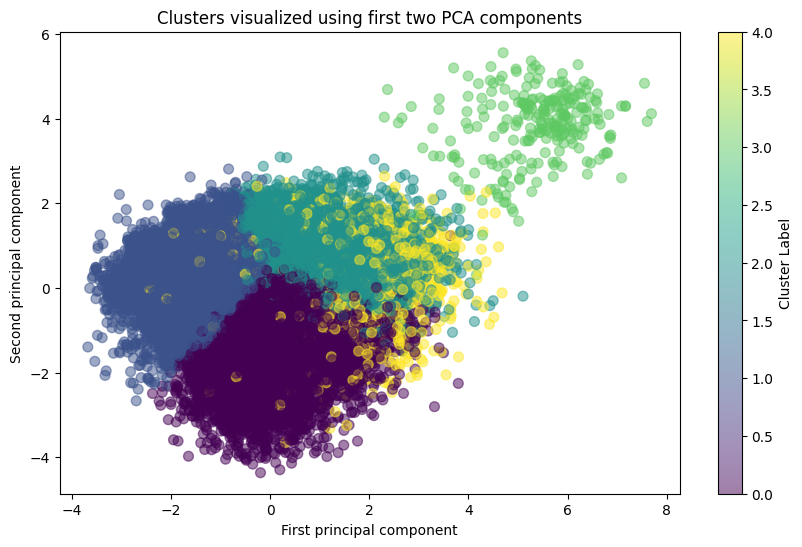

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml

# Load the Adult Census Income dataset from OpenML
adult = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = adult.frame

# Rename columns to lower case and replace hyphens with underscores
df.columns = [col.lower().replace('-', '_') for col in df.columns]

# Select features and target
X = df.drop(columns=['class'])

# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the pipeline with PCA and K-Means
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# Fit the pipeline
pipeline.fit(X)

# Extract the PCA and K-Means steps
pca = pipeline.named_steps['pca']
kmeans = pipeline.named_steps['kmeans']

# Transform the data using PCA
X_pca = pca.transform(preprocessor.transform(X))

# Predict cluster labels
cluster_labels = kmeans.predict(X_pca)

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Plot the clusters using the first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Clusters visualized using first two PCA components')
plt.colorbar(label='Cluster Label')
plt.show()


#### DataFrame with Clusters

In [ ]:
df[['age', 'workclass', 'education', 'marital_status', 'occupation',
'relationship', 'race', 'sex', 'class', 'cluster']]

,age,workclass,education,marital_status,occupation,relationship,race,sex,class,cluster
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K,1
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K,2
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K,0
4,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,<=50K,1
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K,1
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K,0
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K,0
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K,1


#### Silhouette Score: An Overview

The Silhouette Score is a metric used to evaluate the quality of clusters in a clustering algorithm. It measures how similar each point is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher score indicates better-defined and well-separated clusters.

### How is the Silhouette Score Calculated?

For each data point \(i\):
1. **Within-Cluster Distance (\(a(i)\))**:
   - Calculate the average distance between the point \(i\) and all other points within the same cluster. This measures how well the point is assigned to its own cluster.

2. **Nearest-Cluster Distance (\(b(i)\))**:
   - Calculate the average distance between the point \(i\) and all points in the nearest neighboring cluster (the cluster to which \(i\) does not belong, but is closest).

3. **Silhouette Coefficient (\(s(i)\))**:
   - Combine these distances into a single score:
     \[
     s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
     \]
   - The Silhouette Coefficient ranges from -1 to 1:
     - \(s(i) \approx 1\): Point \(i\) is well matched to its own cluster and poorly matched to neighboring clusters.
     - \(s(i) \approx 0\): Point \(i\) is on or very close to the decision boundary between two neighboring clusters.
     - \(s(i) \approx -1\): Point \(i\) might have been assigned to the wrong cluster.

### Interpreting the Silhouette Score

1. **High Silhouette Score (\(> 0.5\))**:
   - Indicates well-separated clusters.
   - Points within a cluster are close to each other, and clusters are far apart from each other.

2. **Moderate Silhouette Score (\(0.2\) to \(0.5\))**:
   - Indicates clusters are not well defined.
   - There is some overlap between clusters, and points within clusters are moderately close to each other.

3. **Low Silhouette Score (\(< 0.2\))**:
   - Indicates poor clustering.
   - Clusters are overlapping significantly, and points are not well clustered.

### Benefits of Using Silhouette Score

1. **Model Selection**:
   - Helps in selecting the appropriate clustering algorithm and number of clusters by comparing silhouette scores across different models and parameters.

2. **Cluster Quality Assessment**:
   - Provides a quantitative measure to assess the quality of clusters formed by the algorithm.

3. **Outlier Detection**:
   - Low silhouette scores can help identify points that do not fit well within any cluster, potentially indicating outliers.

### Conclusion

The Silhouette Score is a powerful metric for evaluating the quality of clusters. It provides insights into the cohesion within clusters and separation between clusters, helping you assess and improve your clustering results.

### Types of Clustering Algorithms

1. **Partitioning Clustering**:
   - **K-Means**: Divides the dataset into K clusters by minimizing the variance within each cluster.
   - **K-Medoids**: Similar to K-Means but uses actual data points (medoids) as cluster centers.

2. **Hierarchical Clustering**:
   - **Agglomerative**: Builds a hierarchy of clusters by merging or splitting existing ones.
   - **Divisive**: Starts with a single cluster and recursively splits it.

3. **Density-Based Clustering**:
   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Finds clusters based on the density of data points.
   - **OPTICS (Ordering Points To Identify the Clustering Structure)**: Extends DBSCAN to handle varying densities.

4. **Model-Based Clustering**:
   - **Gaussian Mixture Models (GMM)**: Assumes data is generated from a mixture of several Gaussian distributions.

5. **Spectral Clustering**:
   - Uses the eigenvalues of a similarity matrix to reduce dimensionality and then performs clustering.

### Key Concepts

1. **Cluster Validity Indices**:
   - **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters.
   - **Davies-Bouldin Index**: Measures the average similarity ratio of each cluster with the cluster that is most similar to it.
   - **Adjusted Rand Index (ARI)**: Measures the similarity between two clusterings by considering all pairs of samples.

2. **Preprocessing for Clustering**:
   - **Standardization**: Scaling features to have zero mean and unit variance.
   - **Normalization**: Scaling features to a range of [0, 1].
   - **Dimensionality Reduction**: Techniques like PCA and t-SNE to reduce the number of features while preserving important information.

3. **Choosing the Number of Clusters**:
   - **Elbow Method**: Plots the explained variance as a function of the number of clusters and looks for an "elbow".
   - **Silhouette Method**: Uses the average silhouette score to find the optimal number of clusters.
   - **Gap Statistic**: Compares the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution.

### Practical Tips

1. **Cluster Initialization**:
   - For K-Means, use the `k-means++` initialization method to improve convergence.

2. **Scaling Features**:
   - Always scale your features, especially when using distance-based clustering algorithms like K-Means and DBSCAN.

3. **Handling Outliers**:
   - Algorithms like DBSCAN are robust to outliers, whereas K-Means is sensitive to them.

4. **Interpreting Clusters**:
   - After clustering, interpret the clusters by examining the mean or median values of features within each cluster.


### Explanation

1. **DBSCAN**:
   - DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that can identify clusters of varying shapes and sizes. It is robust to outliers.

2. **Parameters**:
   - `eps`: The maximum distance between two samples to be considered as in the same neighborhood.
   - `min_samples`: The number of samples in a neighborhood for a point to be considered a core point.

3. **Silhouette Score**:
   - The silhouette score measures how similar a point is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.

4. **Plotting**:
   - The clusters are visualized using the first two principal components from PCA.

By understanding these key concepts and practical tips, you can effectively apply clustering algorithms to your data and interpret the results to gain valuable insights. Let me know if you would like to explore any specific clustering algorithm or concept in more detail!

#### DBScan

Silhouette Score: -0.290


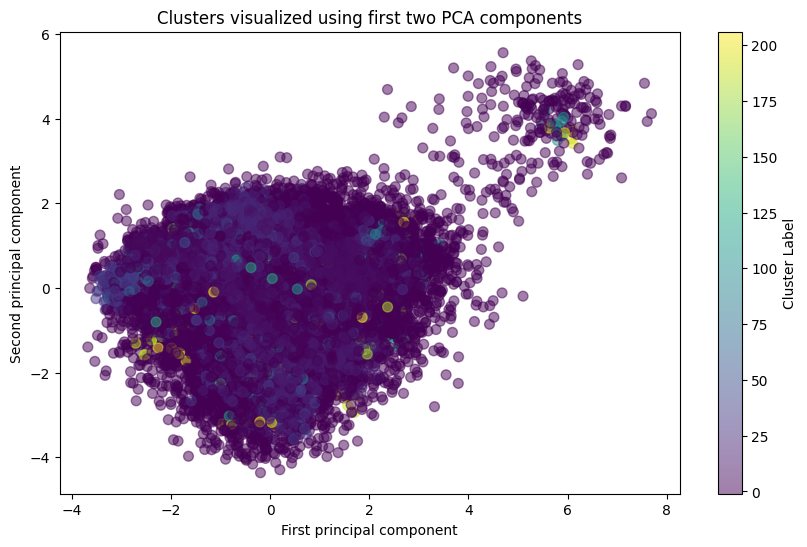

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml

# Load the Adult Census Income dataset from OpenML
adult = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = adult.frame

# Rename columns to lower case and replace hyphens with underscores
df.columns = [col.lower().replace('-', '_') for col in df.columns]

# Select features and target
X = df.drop(columns=['class'])

# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the pipeline with PCA and DBSCAN
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('dbscan', DBSCAN(eps=0.5, min_samples=5))
])

# Fit the pipeline
pipeline.fit(X)

# Extract the PCA and DBSCAN steps
pca = pipeline.named_steps['pca']
dbscan = pipeline.named_steps['dbscan']

# Transform the data using PCA
X_pca = pca.transform(preprocessor.transform(X))

# Predict cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Calculate silhouette score (only if there are more than 1 cluster)
if len(set(cluster_labels)) > 1:
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg:.3f}')
else:
    print('Silhouette Score cannot be calculated. Only one cluster found.')

# Plot the clusters using the first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Clusters visualized using first two PCA components')
plt.colorbar(label='Cluster Label')
plt.show()

#### Hierarchical Clustering with Dendrogram

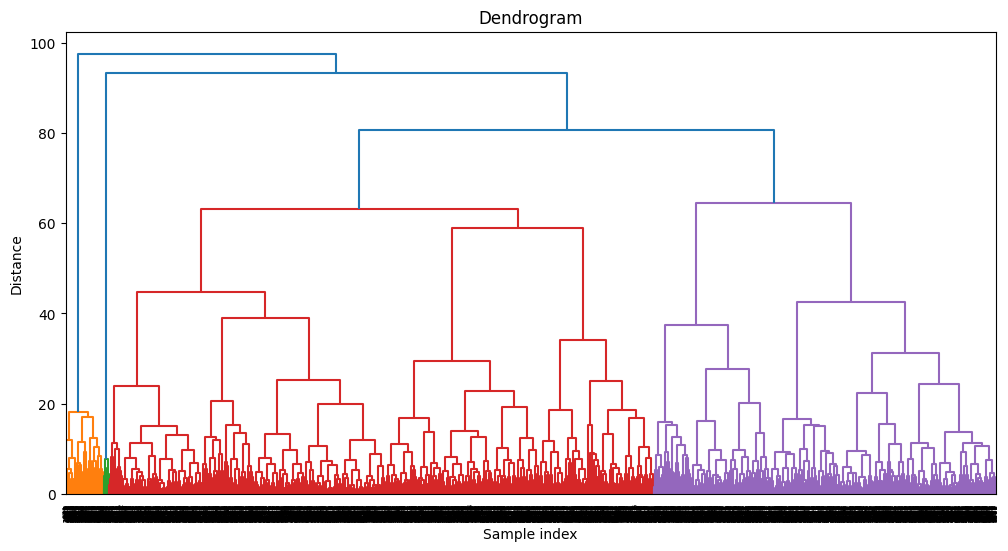

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import fetch_openml

# Load the Adult Census Income dataset from OpenML
adult = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = adult.frame

# Rename columns to lower case and replace hyphens with underscores
df.columns = [col.lower().replace('-', '_') for col in df.columns]

# Select features and target
X = df.drop(columns=['class'])

# Take a sample of the data to avoid running out of memory
X_sample = X.sample(frac=0.1, random_state=42)  # Adjust frac as needed
df_sample = X_sample.copy()

# Identify column types
numeric_features = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_sample.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the pipeline with PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10))
])

# Fit the pipeline
X_transformed = pipeline.fit_transform(X_sample)

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
cluster_labels = agg_clustering.fit_predict(X_transformed)

# Add cluster labels to the sampled DataFrame
df_sample['cluster'] = cluster_labels

# Create linkage matrix for the dendrogram
linkage_matrix = linkage(X_transformed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#### What is a Dendrogram?

A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering. It is a visual representation of the hierarchical structure of clusters formed by hierarchical clustering algorithms, such as agglomerative clustering.

### How to Interpret a Dendrogram

1. **Leaves (Data Points)**:
   - The leaves at the bottom of the dendrogram represent individual data points.

2. **Nodes (Clusters)**:
   - Nodes where branches join represent clusters formed by merging smaller clusters or individual data points.

3. **Height**:
   - The height of the nodes represents the distance or dissimilarity at which clusters are merged. The y-axis typically shows this distance.
   - A larger height indicates a greater dissimilarity between clusters being merged.

4. **Horizontal Lines**:
   - Each horizontal line represents a merge that happened during the clustering process. The position of the line on the y-axis shows the distance at which the merge occurred.

5. **Vertical Lines**:
   - Vertical lines connect the clusters being merged. The length of the vertical lines has no specific meaning; they are drawn to illustrate which clusters are connected.

6. **Clusters**:
   - By cutting the dendrogram at a specific height, you can determine the number of clusters. All nodes connected below this height form individual clusters.

### Detailed Explanation

1. **Creating the Linkage Matrix**:
   - The `linkage` function creates a hierarchical clustering encoded as a linkage matrix. Here, the `ward` method is used, which minimizes the variance of the clusters being merged.

2. **Plotting the Dendrogram**:
   - The `dendrogram` function plots the dendrogram from the linkage matrix.
   - The x-axis represents individual data points or clusters.
   - The y-axis represents the distance or dissimilarity at which clusters are merged.

3. **Interpreting the Dendrogram**:
   - **Leaves**: Each leaf on the dendrogram represents an individual data point from the dataset.
   - **Nodes**: Nodes where branches join indicate clusters. The position of the node on the y-axis represents the distance at which the clusters were merged.
   - **Height**: The height of the merge (y-axis value) indicates the dissimilarity between the clusters being merged. Higher nodes indicate merges between more dissimilar clusters.
   - **Cutting the Dendrogram**: By drawing a horizontal line at a certain height, you can cut the dendrogram to form clusters. The number of vertical lines intersected by the cut line indicates the number of clusters.

### Practical Example

Suppose the dendrogram shows the following characteristics:
- **Single Cluster**: If you cut the dendrogram at a very high distance, all data points may fall into a single cluster.
- **Multiple Clusters**: Cutting at a lower distance may result in multiple clusters. For example, cutting the dendrogram at a height where it intersects 5 vertical lines will result in 5 clusters.
- **Outliers**: Very high nodes that only merge at a high distance may indicate outliers, as these points are very dissimilar from the rest.

### Conclusion

A dendrogram is a powerful tool for visualizing the hierarchical structure of clusters formed by hierarchical clustering algorithms. By examining the dendrogram, you can determine the number of clusters, understand the relationships between data points, and identify outliers. This visual representation provides valuable insights into the data's structure and helps in making informed decisions about the clustering process.